
# Test clouds: Ridge functions


### JAH, May 2021

In [1]:
%matplotlib inline
#%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [7]:
import numpy             as np
import matplotlib.pyplot as plt
import scipy.ndimage     as ndimg

import clouds.clouds    as clouds
import clouds.pltclouds as pltclouds

import clouds.ridges      as ridges
import clouds.test_ridges as tridges

In [3]:
plt.rcParams['image.cmap'] = 'rainbow'

In [4]:
import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Mon May 24 10:47:01 2021


## Test

   * Generate a 2D and 3D function with know gradient, laplacian, eigenvalues and ridge
   
   * Validate gradient, laplacian, eigenvalues, ridge
   
   * Define a Ridge filter


## Generate Function

In [26]:
fig  = lambda nx = 1, ny = 1, sz = 5 : plt.figure(figsize = (ny * sz, nx * sz))
ax3d = lambda nx = 1, ny = 1, i = 1  : plt.gcf().add_subplot(nx, ny, i, projection = '3d')
hopts = {'histtype' : 'step'}
efig = plt.tight_layout

## Generate image

In [156]:
def _ana_img(img, perc = 20):
    
    xmesh = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]), indexing = 'ij')

    sx = ndimg.sobel(img, axis=0, mode='constant')
    sy = ndimg.sobel(img, axis=1, mode='constant')
    sob = np.hypot(sx, sy)

    fig(2, 3)
    ax = ax3d(2, 3, 1)
    ax.plot_surface(*xmesh, img, cmap = 'rainbow');

    plt.subplot(2, 3, 2)
    plt.imshow(img);
    plt.title('img')

    plt.subplot(2, 3, 3)
    plt.imshow(sob);
    plt.title('sobel filter')
    
    grad    = ridges.gradient(img);
    gradsph = ridges.vector_in_spherical(grad)
    vgrad   = gradsph[0]
    
    plt.subplot(2, 3, 4)
    plt.imshow(vgrad, alpha = 1.)
    plt.title('grad filter')

    mask = img > 0
    plt.subplot(2, 3, 5)
    sel, l = ridges.edge_filter(img, perc = perc, mask = mask)
    plt.imshow(img, alpha = 0.2)
    plt.imshow(sel, alpha = 0.5, cmap = 'binary')
    plt.title('edge filter')
    
    plt.subplot(2, 3, 6)
    sel, l = ridges.ridge_filter(img, perc = perc, mask = mask)
    plt.imshow(img, alpha = 0.3, cmap = 'rainbow')
    plt.imshow(sel, alpha = 0.5, cmap = 'binary')
    plt.title('ridge filter')


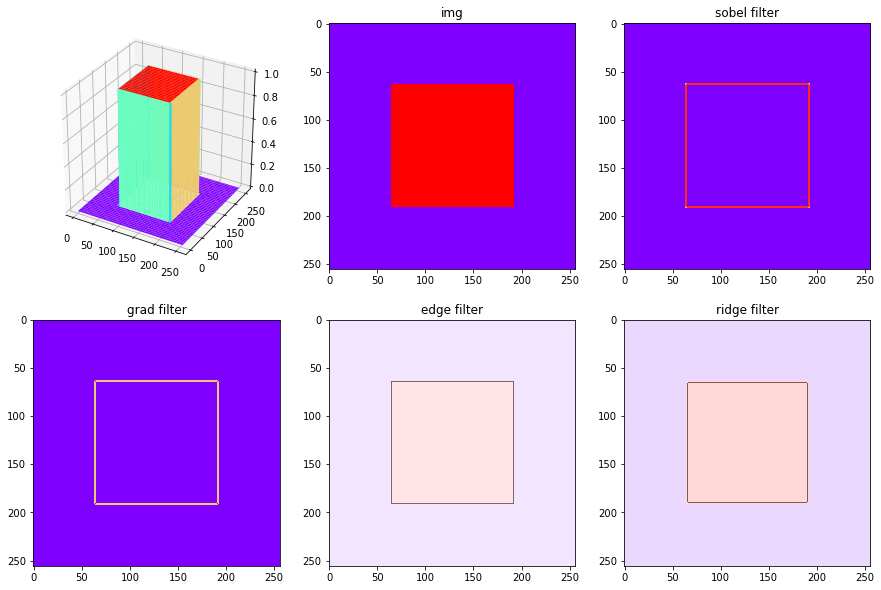

In [176]:
size    = 256
square = 64
sigma = 0

img = np.zeros((size, size))
img[square : -square, square : -square] = 1
img = ndimg.gaussian_filter(img, sigma)
_ana_img(img, 10)

**Conclusions:**

   * Edge and Ridge filter computes mathematically the correct answer
   
   * But now, if we want to know the edge before the smearing?
   
   

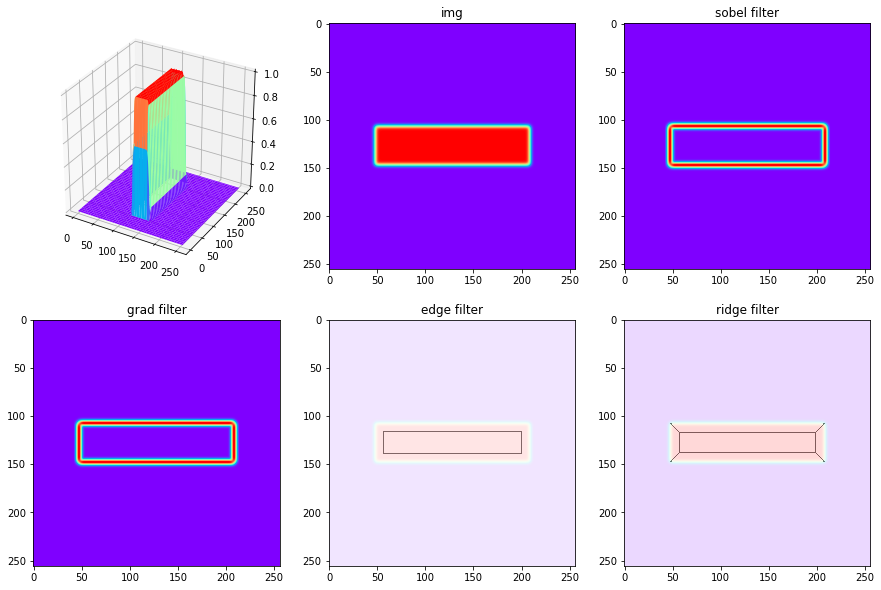

In [181]:
size    = 256
i0      = int(256/2)
sx, sy  = 20, 80
sigma   = 2 

img = np.zeros((size, size))
img[ i0 - sx : i0 + sx, i0 - sy : i0 + sy] = 1
img = ndimg.gaussian_filter(img, sigma)

_ana_img(img, perc = 10);

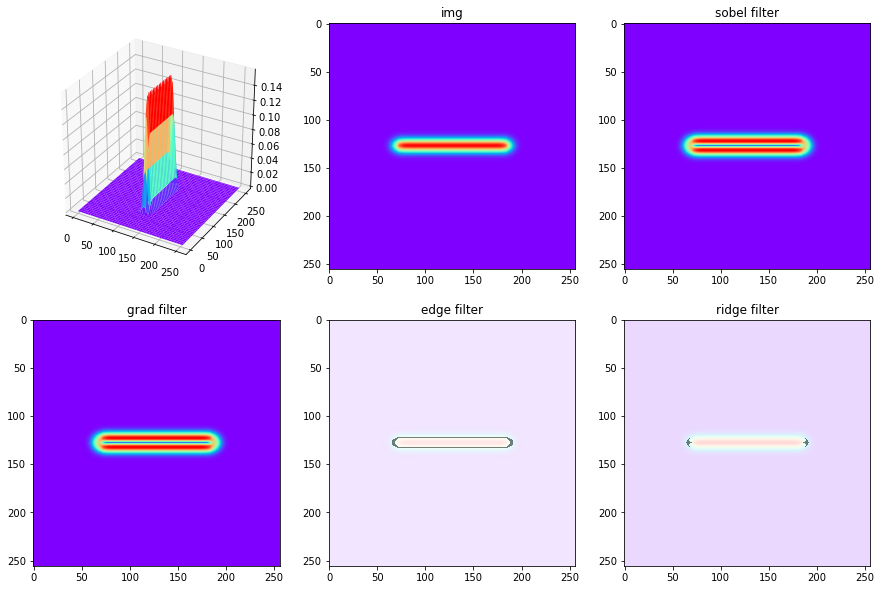

In [175]:
size    = 256
i0      = int(256/2)
sx, sy  = 1, 60
sigma   = 5 
perc    = 20

img = np.zeros((size, size))
img[ i0 - sx : i0 + sx, i0 - sy : i0 + sy] = 1
img = ndimg.gaussian_filter(img, sigma)

_ana_img(img, perc = perc);

**Conclusion:**
    
   * The edge and ridge determination depends on the degradation respect the original image, the degradation ratio,
   
   * Is scale is smaller 1/10. Ridges and edges are propoerly reconstructed.
   
   * Is smearing is 5 times the original, the ridges only find the extremes. The edges can find the border still